**Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

%matplotlib inline

**Load Data**

In [11]:
df_titanic = pd.read_csv('train.csv')

**EDA**

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_null_values = df_titanic.isnull().sum()

In [15]:
titanic_null_values.sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

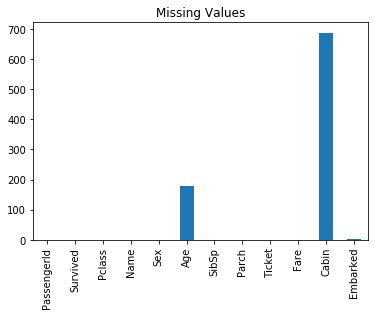

In [16]:
df_titanic.isnull().sum().plot(kind='bar')
plt.title('Missing Values')

The Cabin column has the most NaN values with 687

In [9]:
#Delete all rows where 'Embarked' is empty
df_titanic = df_titanic[df_titanic['Embarked'].notna()]

In [17]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Fill all empty cabin cells
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('¯\(ツ)/¯')

C:\Users\v_sha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Create 'FamilyCount' column with sum of the two columns that pertain to family members


df_titanic['FamilyCount'] = df_titanic['SibSp'] + df_titanic['Parch']

C:\Users\v_sha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
#Create column named 'IsReverend': if yes = 1 if no =0

df_titanic['IsReverend'] = df_titanic['Name'].str.contains('Rev.',).astype(int)

In [20]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_titanic = pd.get_dummies(df_titanic, columns = ['Embarked'],)

In [21]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_titanic = pd.get_dummies(df_titanic, columns = ['Sex'],)

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [389]:
#Overall Survival Rate:

overall = (round(np.sum(df_titanic['Survived']/df_titanic.shape[0])*100,2))

In [390]:
overall

38.25

In [286]:
#Which gender fared the worst? What was their survival rate?

male_survived = (round(np.sum((df_titanic['Sex_male'] == 1) & (df_titanic['Survived'] == 1))/
                     np.sum(df_titanic['Sex_male'] == 1)* 100,2))

female_survived = (round(np.sum((df_titanic['Sex_female'] == 1) & (df_titanic['Survived'] == 1)) /
                   np.sum(df_titanic['Sex_female'] == 1)* 100,2))




In [378]:
male_survived

18.89

In [379]:
female_survived

74.04

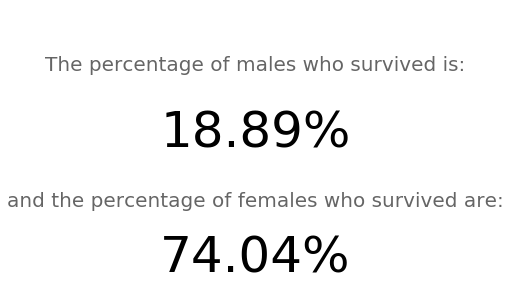

In [377]:
plt.figure(figsize=(8, 5))


plt.text(x = 0.5,                              
         y = 0.8,                              
         s = 'The percentage of males who survived is:', 
         ha = 'center',                        
         va = 'center',                        
         size = 20,                            
         alpha = 0.6)                          


plt.text(x = 0.5,
         y = 0.55,
         s = str(male_survived) + '%',
         ha = 'center',
         va = 'center',
         size = 50,
         alpha = 1)


plt.text(x = 0.5,
         y = 0.30,
         s = 'and the percentage of females who survived are:',
         ha = 'center',
         va = 'center',
         size = 20,
         alpha = 0.6)

plt.text(x = 0.5,
         y = 0.090,
         s = str(female_survived) + '%',
         ha = 'center',
         va = 'center',
         size = 50,
         alpha = 1)


plt.axis('off');


In [420]:
#What was the survival rate for each Pclass?

for i in df_titanic.Pclass.unique():
    print('The survival rate for Pclass', i,'is:', 
          round(np.sum((df_titanic['Pclass'] == i) & (df_titanic['Survived'] == 1))/
                np.sum((df_titanic['Pclass'] == i))*100,2), '%')


The survival rate for Pclass 3 is: 24.24 %
The survival rate for Pclass 1 is: 62.62 %
The survival rate for Pclass 2 is: 47.28 %


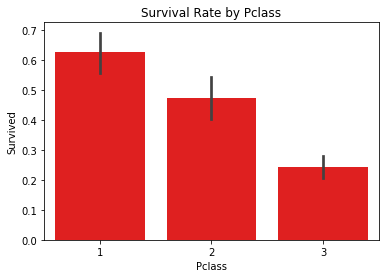

In [426]:
plt.title('Survival Rate by Pclass')
sns.barplot('Pclass', 'Survived', data=df_titanic, color = 'red')
plt.show()


In [80]:
#Did any reverends survive? How many?

print('The number of reverends that survived is:',
      np.sum((df_titanic['IsReverend'] == 1) & (df_titanic['Survived'] == 1)))

The number of reverends that survived is: 0


In [109]:
# What is the survival rate for cabins marked ¯\(ツ)/¯

Cabin_surival = print("The survival rate for cabins marked '¯\(ツ)/¯' is:", 
                      (round(np.sum((df_titanic['Cabin'] == '¯\(ツ)/¯') & (df_titanic['Survived'] == 1))/
                             np.sum((df_titanic['Cabin'] == '¯\(ツ)/¯'))*100,2)), "%")

The survival rate for cabins marked '¯\(ツ)/¯' is: 29.99 %


In [175]:
# What is the survival rate for people whose Age is empty?

empty_age = print('Survival rate of people whose age is empty is:',
                  (round(np.sum((df_titanic['Age'].isna() == True) & (df_titanic['Survived'] == 1))/
                         np.sum((df_titanic['Age'].isna() == 1))*100,2)), "%")

Survival rate of people whose age is empty is: 29.38 %


In [263]:
#What is the survival rate for each port of embarkation?

for i in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print('The survival rate of ', i,'is:', 
          round(np.sum((df_titanic[i] == 1) & (df_titanic['Survived'] == 1))/
                np.sum((df_titanic[i] == 1))*100,2), '%')

The survival rate of  Embarked_C is: 55.36 %
The survival rate of  Embarked_Q is: 38.96 %
The survival rate of  Embarked_S is: 33.7 %


In [432]:
df_titanic_embarked = pd.read_csv('train.csv')

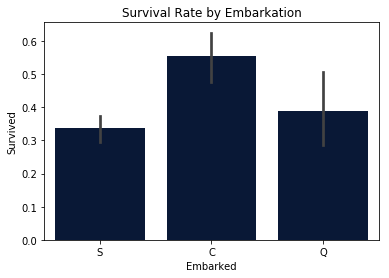

In [436]:
plt.title('Survival Rate by Embarkation') 
sns.barplot('Embarked', 'Survived', data = df_titanic_embarked, color='xkcd:navy');

In [189]:
# What is the survival rate for children (under 12) in each Pclass?

for i in df_titanic.Pclass.unique():
    print('The survival rate for children (under 12) in Pclass', i, 'is:', 
          round(np.sum((df_titanic['Pclass'] == i) & (df_titanic['Age'] < 12) & (df_titanic['Survived'] == 1))/
                np.sum((df_titanic['Pclass'] == i))*100,2), '%')

The survival rate for children (under 12) in Pclass 3 is: 3.87 %
The survival rate for children (under 12) in Pclass 1 is: 1.4 %
The survival rate for children (under 12) in Pclass 2 is: 9.24 %


In [215]:
#Did the captain of the ship survive? Is he on the list?
df_titanic[df_titanic['Name'].str.contains('Capt.') & (df_titanic['Survived'] ==1)]

# The captain is not listed.

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male


In [262]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

max_tick = np.max(df_titanic[df_titanic['Survived']== 0]['Fare'])


dead_people = df_titanic[(df_titanic['Fare']==max_tick)&(df_titanic.Survived==0)]['Name']

print(dead_people," These are the deceased who paid the highest ticket amount of:", max_tick)

27     Fortune, Mr. Charles Alexander
438                 Fortune, Mr. Mark
Name: Name, dtype: object  These are the deceased who paid the highest ticket amount of: 263.0


In [268]:
#Does having family on the boat help or hurt your chances of survival?

#Without Family
print(round(np.sum((df_titanic['FamilyCount'] == 0) & (df_titanic['Survived'] == 1))/
                np.sum((df_titanic['FamilyCount'] == 0))*100,2), '%')

30.09 %


In [276]:
#With Family
print(round(np.sum((df_titanic['FamilyCount'] > 0) & (df_titanic['Survived'] == 1))/
                np.sum((df_titanic['FamilyCount'] > 0))*100,2), '%')

50.56 %
